In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [25]:
normPathPred = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/normPredPath.csv")
normPathPred.head(20)

,gene,indels,transitions,transversions,hom_perbp,het_perbp,seq_type,description
0,MT-ATP6,0.000000,0.696629,0.303371,11.100000,0.383824,protein_coding_gene,ATP synthase F0 subunit 6
1,MT-ATP8,0.060606,0.666667,0.272727,24.407767,0.509709,protein_coding_gene,ATP synthase F0 subunit 8
2,MT-CO1,0.005435,0.750000,0.244565,92.195328,0.512005,protein_coding_gene,Cytochrome c oxidase subunit I
3,MT-CO2,0.010309,0.742268,0.247423,11.696925,0.387994,protein_coding_gene,Cytochrome c oxidase subunit II
4,MT-CO3,0.022901,0.740458,0.236641,20.208174,0.489144,protein_coding_gene,Cytochrome c oxidase subunit III
5,MT-CYB,0.008811,0.704846,0.286344,13.059649,0.639474,protein_coding_gene,Cytochrome b
6,MT-NC3,0.000000,1.000000,0.000000,146.000000,4.666667,non_coding,non-coding nucleotides
7,MT-NC5,0.769231,0.076923,0.153846,23.636364,4.181818,non_coding,non-coding nucleotides
8,MT-ND1,0.027211,0.693878,0.278912,30.827225,0.337173,protein_coding_gene,NADH Dehydrogenase subunit 1
9,MT-ND2,0.019608,0.721569,0.258824,29.354467,0.622478,protein_coding_gene,NADH dehydrogenase subunit 2


### Obtaining the proportions of mutations per gene per mutation type for predicted pathogenic variants from the random forest

In [26]:
indels = normPathPred['indels']
transitions = normPathPred['transitions']
transversions = normPathPred['transversions']
proportion = np.concatenate([indels, transitions, transversions])
gene = normPathPred['gene']
seq_type = normPathPred['seq_type']
gene = np.concatenate([gene, gene, gene])
seq_type = np.concatenate([seq_type, seq_type, seq_type])
types =np.array(['indels', 'transitions', 'transversions'])

mutation = np.repeat(types, len(normPathPred['gene']))

pathByMutation = pd.DataFrame({'gene':gene, 'seq_type': seq_type, 'proportion':proportion, 'mutation':mutation})
pathByMutation.head(40)

,gene,seq_type,proportion,mutation
0,MT-ATP6,protein_coding_gene,0.000000,indels
1,MT-ATP8,protein_coding_gene,0.060606,indels
2,MT-CO1,protein_coding_gene,0.005435,indels
3,MT-CO2,protein_coding_gene,0.010309,indels
4,MT-CO3,protein_coding_gene,0.022901,indels
5,MT-CYB,protein_coding_gene,0.008811,indels
6,MT-NC3,non_coding,0.000000,indels
7,MT-NC5,non_coding,0.769231,indels
8,MT-ND1,protein_coding_gene,0.027211,indels
9,MT-ND2,protein_coding_gene,0.019608,indels


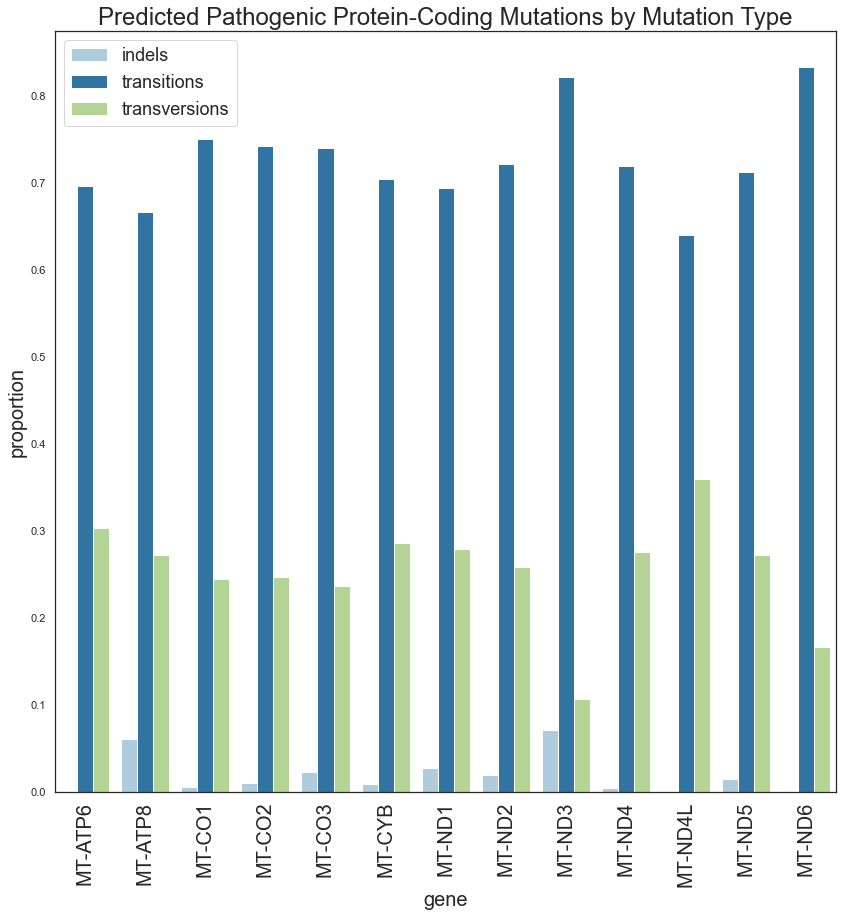

In [27]:
proDF = pathByMutation[pathByMutation['seq_type']=='protein_coding_gene']
plt.figure(figsize=(14,14))
p = sns.barplot(x = proDF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(proDF['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Predicted Pathogenic Protein-Coding Mutations by Mutation Type', fontsize = 24);
plt.savefig('predProByMut.pdf') 

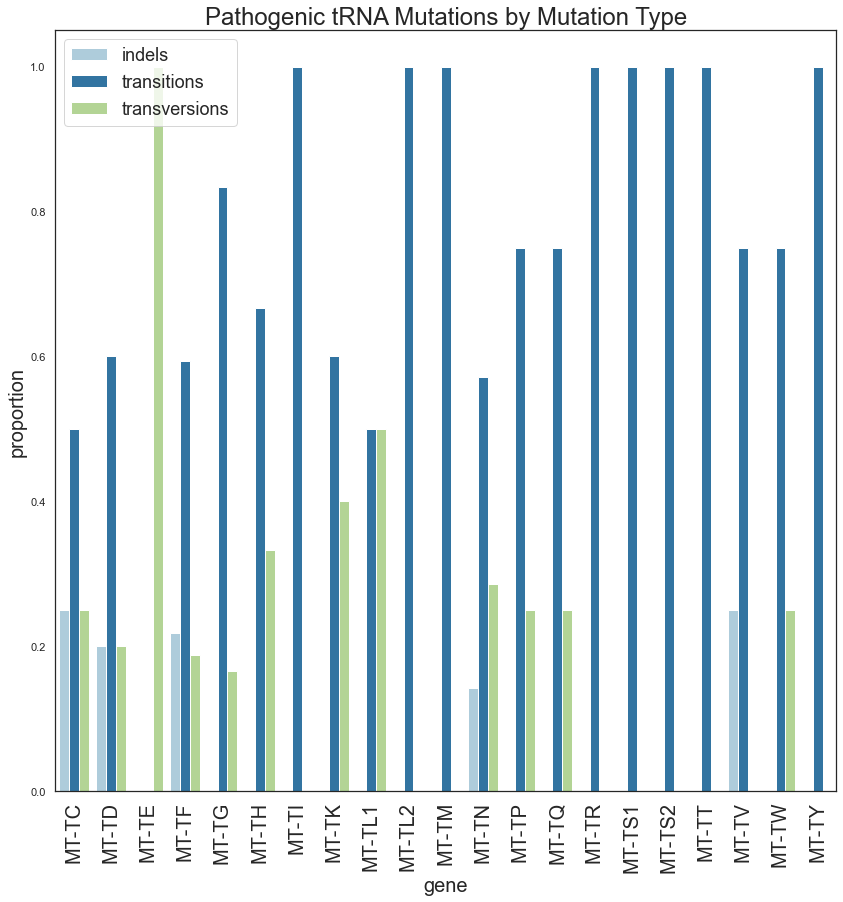

In [28]:
tRNADF = pathByMutation[pathByMutation['seq_type']=='tRNA_gene']
tRNADF
plt.figure(figsize=(14, 14))
p = sns.barplot(x = tRNADF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'],
               palette = sns.color_palette("Paired"))
p.set_xticklabels(tRNADF['gene'], rotation=90, fontsize=20)
p.set_title('Pathogenic tRNA Mutations by Mutation Type', fontsize = 24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('predtRNAbyMut.pdf')

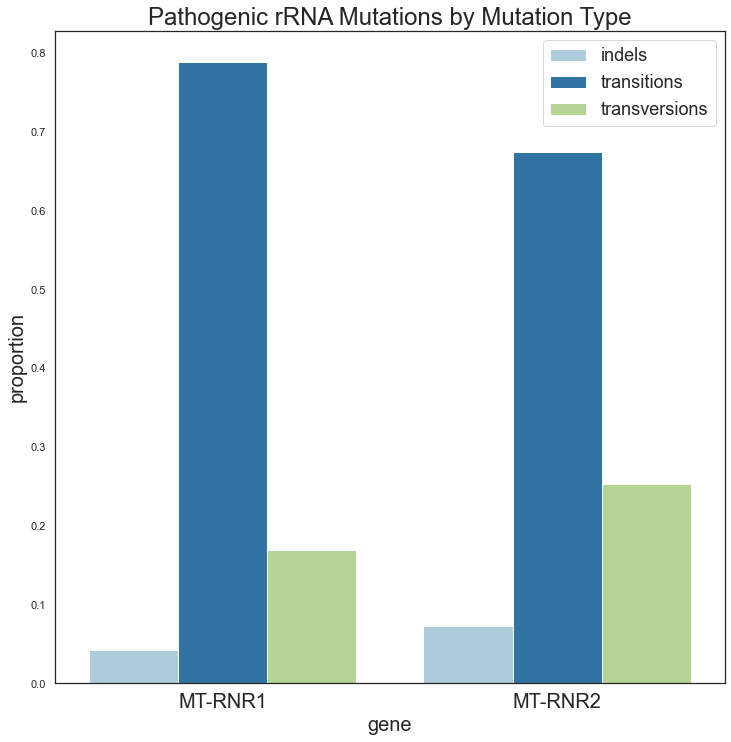

In [29]:
rRNADF = pathByMutation[pathByMutation['seq_type']=='rRNA_gene']
plt.figure(figsize=(12,12))
p = sns.barplot(x = rRNADF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(rRNADF['gene'],fontsize=20)
p.set_title('Pathogenic rRNA Mutations by Mutation Type', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('predrRNAbyMut.pdf')

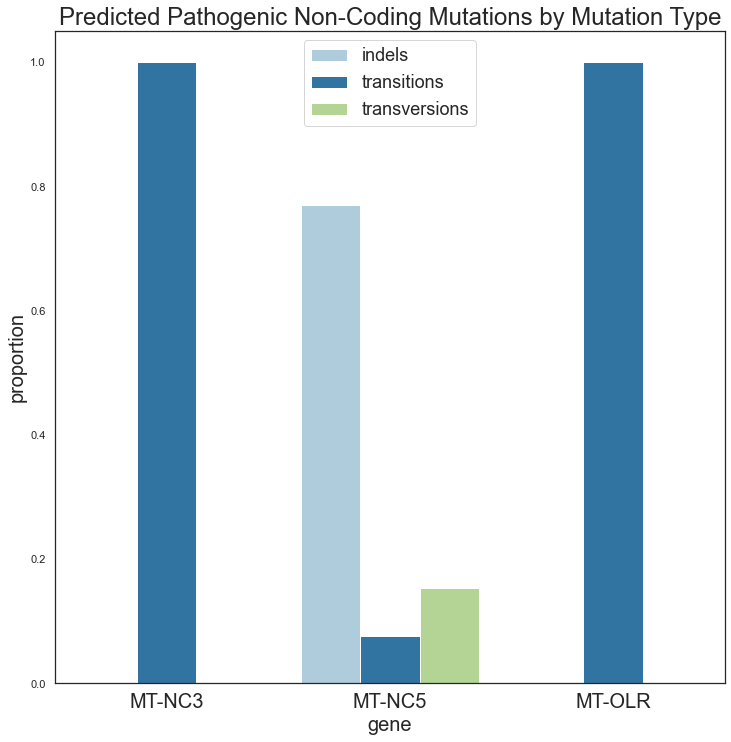

In [32]:
NCDF = pathByMutation[pathByMutation['seq_type']=='non_coding']
plt.figure(figsize=(12,12))
p = sns.barplot(x = NCDF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(NCDF['gene'], fontsize=20)
p.set_title('Predicted Pathogenic Non-Coding Mutations by Mutation Type', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('pathNCbyMut.pdf')

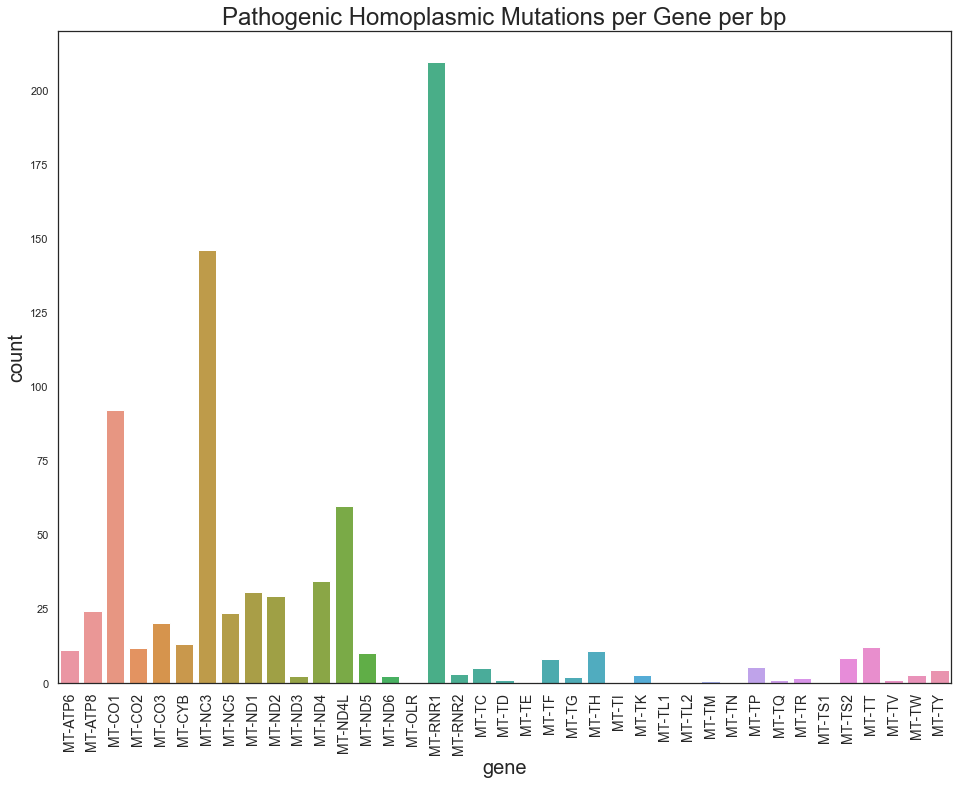

In [31]:
plt.figure(figsize=(16,12))
p = sns.barplot(x = normPathPred.loc[:,'gene'], y = normPathPred.loc[:,'hom_perbp'])
p.set_xticklabels(normPathPred['gene'], rotation=90,fontsize=14)
p.set_title('Pathogenic Homoplasmic Mutations per Gene per bp', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
plt.savefig('predHomoPerGene.pdf')

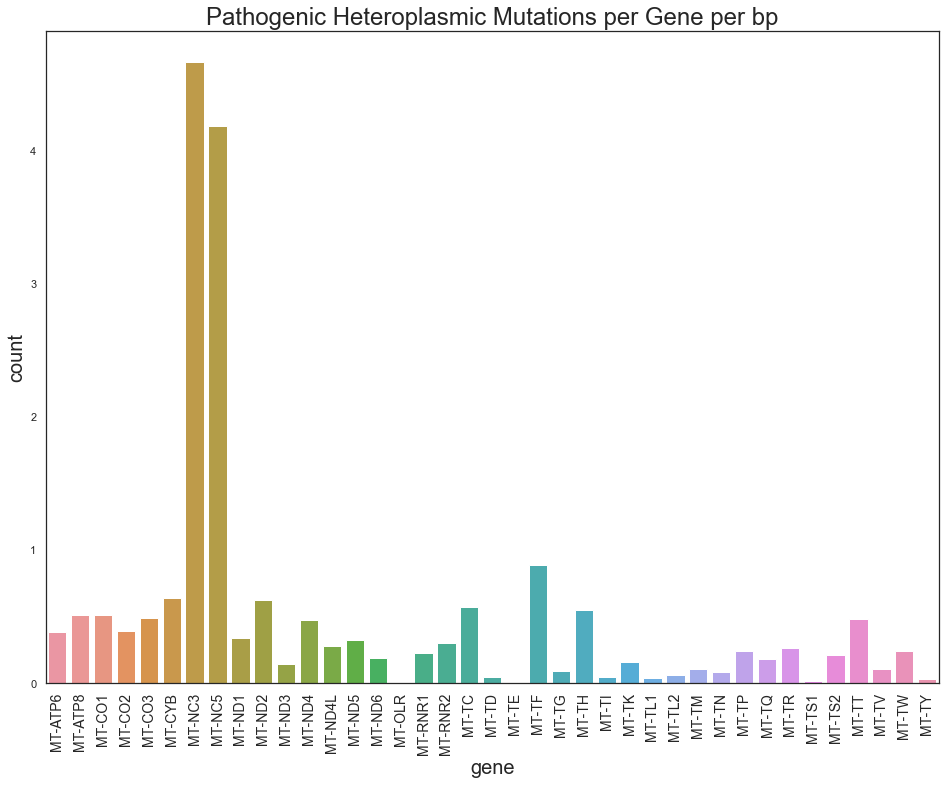

In [16]:
plt.figure(figsize=(16,12))
p = sns.barplot(x = normPathPred.loc[:,'gene'], y = normPathPred.loc[:,'het_perbp'])
p.set_xticklabels(normPathPred['gene'], rotation=90,fontsize=14)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
p.set_title('Pathogenic Heteroplasmic Mutations per Gene per bp', fontsize=24);
plt.savefig('predHetByGene.pdf')

In [22]:
pathYes = pd.read_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/predPathYes.csv')

3                     940
1                     469
2                     292
non_coding            191
rRNA                  154
tRNA                  114
anticodon               2
replication origin      1
Name: annotation, dtype: int64


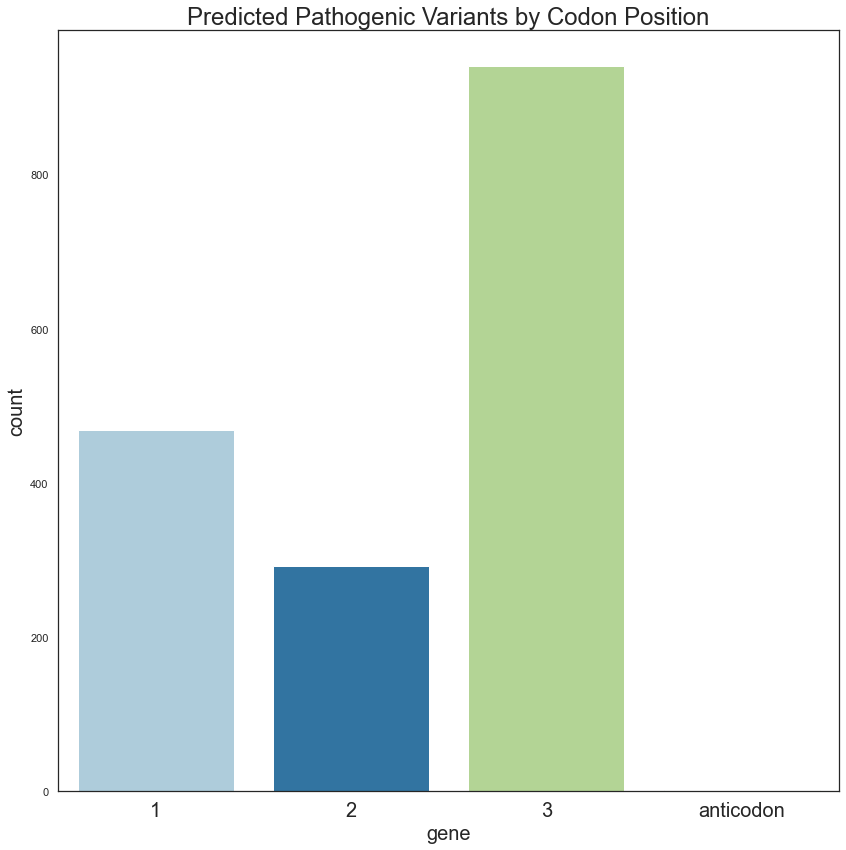

In [23]:
print(pathYes['annotation'].value_counts())
pathYes['annotation'].value_counts()
pathYesDF = pd.DataFrame(pathYes['annotation'].value_counts())
pathYesDF.reset_index(inplace=True)
pathYesDF.columns = ['position', 'count'] 
pathYesDF.head(10)

new_index = [1, 2, 0, 6]
pathYesDF = pathYesDF.reindex(new_index)
pathYesDF.reset_index(inplace=True)
pathYesDF = pathYesDF.drop(columns=['index'])
# invDF = totInv[totInv['annotation']!= 'NaN']
pathYesDF.head(10)

plt.figure(figsize=(14,14))
p = sns.barplot(x = pathYesDF.loc[:,'position'], y = pathYesDF.loc[:,'count'], palette = sns.color_palette("Paired"))
p.set_title('Predicted Pathogenic Variants by Codon Position', fontsize=24);
p.set_xticklabels(pathYesDF['position'], fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
plt.savefig('predPathByCodon.pdf')